# Lab 3: Linear Regression

In this assignment, we will learn the Linear Regression model. 

First, please study the given example, which uses linear regression for the house price prediction task. In this example, you will learn how to preprocess data, how to train the model, and how to evaluate the model. 

Based on the given example and Lab Assignment 2, your task is to use the linear regression model to predict the medical cost for the dataset given in Lab Assignment 2. 

## 1. Example: Linear Regression for House Price Prediction

In this example, we use the house price dataset. It gives the attributes and price of each house. The task is to build a linear regression model to make prediction for the price of the house.

### 1.1 Preprocess the raw data

When given a new dataset, we need to deal with the missing values and categorical features. 

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('housing.csv')

# 0. fill in missing values
mean_val = df['total_bedrooms'].mean()
df['total_bedrooms'] = df['total_bedrooms'].fillna(mean_val)
print(df.isnull().sum())

# 1. convert categorical features to numerical values
labelencoder = LabelEncoder()
df['ocean_proximity'] = labelencoder.fit_transform(df['ocean_proximity'])
print(df.info())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  int32  
dtypes: float64(4), int32(1), int64(5)
memory usag

### 1.2 Split the preprocessed dataset into training set and testing set

For the supervised learning, we need to split the dataset into the training set and test set. The training set is used to learn model parameters and the testing set is used to evaluate the learned model. 

Note that the testing set is NOT allowed to be used in the training phase. 

In [2]:
# 2. split samples
house_fea = df.drop('median_house_value', axis=1).values
house_price = df['median_house_value'].values
house_price = house_price / np.max(house_price)

X_train,X_test,y_train,y_test = train_test_split(house_fea,
                                                 house_price,
                                                 test_size=0.2,
                                                 random_state=42)
print(X_train.shape)
print(X_test.shape)


# normalize features
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

(16512, 9)
(4128, 9)


### 1.3 Train the linear regression model 

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$



Here, we use the training set to learn the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$. 

Then, we compute MAE, MSE, and RMSE to see how well the learned model fit the training set. 

In [3]:
#3. train the model
lr = LinearRegression()

lr.fit(X_train,y_train)

print("bias is "+str(lr.intercept_))
print("coefficients  is "+str(lr.coef_))

y_train_pred = lr.predict(X_train)

mae = mean_absolute_error(y_train_pred,y_train)
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)

print('prediction for training set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


bias is 0.41438855869860675
coefficients  is [-0.17170955 -0.18189176  0.02984855 -0.0353864   0.09753502 -0.08776816
  0.03520256  0.15428789 -0.00090304]
prediction for training set:
MAE is: 0.10125365457873205
MSE is: 0.0192437559440504
RMSE is: 0.13872186541439818


### 1.4 Evaluate the linear regression model

After obtaining the model parameter $\mathbf{w}=(w_0, w_1, w_2, \cdots, w_d)$, the linear regression model is determined. Then, we need to evaluate this model to see how well this model generaizes on the testing set. 

prediction for testing set:
MAE is: 0.10369354831097968
MSE is: 0.02022001958450324
RMSE is: 0.14219711524677017


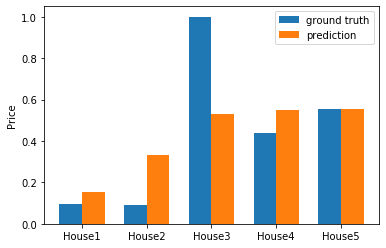

In [4]:
#4. evaluate the model
y_test_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test_pred,y_test)
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)

print('prediction for testing set:')
print('MAE is: {}'.format(mae))
print('MSE is: {}'.format(mse))
print('RMSE is: {}'.format(rmse))


labels = ['House1', 'House2', 'House3', 'House4', 'House5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y_test_pred[0:5], width, label='prediction')

ax.set_ylabel('Price')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


## 2. Task: Linear Regression for Medical Cost Prediction

Following the given example, build a linear regression model for [the insurance dataset](./insurance.csv) to predict the medical cost.  


### 2.1 Preprocess the raw data

Based on your Lab Assignment 2, deal with the missing values and categorical features. 

In [59]:
# your code
df2 = pd.read_csv('insurance.csv')

print(df2.isnull().sum())

df2['sex'] = labelencoder.fit_transform(df2['sex'])
df2['smoker'] = labelencoder.fit_transform(df2['smoker'])
df2['region'] = labelencoder.fit_transform(df2['region'])

df2

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### 1.2 Split the preprocessed dataset into training set and testing set

Use 80% of samples as the training set and 20% of samples as the testing set

In [60]:
# your code
insurance_features = df2.drop('charges', axis=1).values
insurance_price = df2['charges'].values
insurance_price = insurance_price / np.max(insurance_price)

x2_train, x2_test, y2_train, y2_test = train_test_split(insurance_features, insurance_price, test_size=0.2, random_state=9)

#normalizer = StandardScaler()
x2_train = normalizer.fit_transform(x2_train)
x2_test = normalizer.fit_transform(x2_test)

### 1.3 Train the linear regression model 

Use the Linear regression model to do prediction

$\min_{w}\frac{1}{n}\|y-X\mathbf{w}\|_2^2$

Please output the learned model parameter $\mathbf{w}$ and see how the learned model fit the training set. 

In [62]:
# your code
lr2 = LinearRegression()

lr2.fit(x2_train, y2_train)

print('Bias:', str(lr2.intercept_))
print('Coefficients:', str(lr2.coef_))

y2_train_prediction = lr2.predict(x2_train)

mae2 = mean_absolute_error(y2_train_prediction, y2_train)
mse2 = mean_squared_error(y2_train_prediction, y2_train)
rmse2 = np.sqrt(mse2)

print('Mean Absolute Error:', mae2)
print('Mean Squared Error:', mse2)
print('Root Mean Squared Error:', rmse2)

Bias: 0.208710811990848
Coefficients: [ 0.05647635 -0.00044681  0.03035979  0.00834883  0.15074465 -0.00521393]
Mean Absolute Error: 0.06651136442982923
Mean Squared Error: 0.009304984213157529
Root Mean Squared Error: 0.09646234608984756


### 1.4 Evaluate the linear regression model


Evaluate the learned model to see how well this model generaizes on the testing set. 

Mean Absolute Error: 0.060104733344457456
Mean Squared Error: 0.007665913332644154
Root Mean Squared Error: 0.0875552016309948


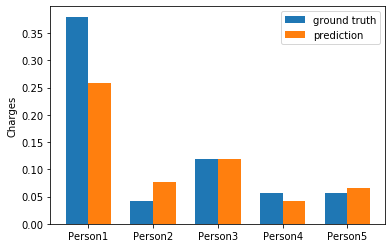

In [63]:
# your code
y2_test_prediction = lr2.predict(x2_test)

mae2 = mean_absolute_error(y2_test_prediction, y2_test)
mse2 = mean_squared_error(y2_test_prediction, y2_test)
rmse2 = np.sqrt(mse2)

print('Mean Absolute Error:', mae2)
print('Mean Squared Error:', mse2)
print('Root Mean Squared Error:', rmse2)

labels = ['Person1', 'Person2', 'Person3', 'Person4', 'Person5']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, y2_test[0:5], width, label='ground truth')
rects2 = ax.bar(x + width/2, y2_test_prediction[0:5], width, label='prediction')

ax.set_ylabel('Charges')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### 1.5 Use the ridge regression model to do prediction

$\min_{w}\frac{1}{n}\|y-Xw\|_2^2 + \lambda \|w\|_2^2$

* 1.5.1 Compare its performance on the testing set with that of the standard linear regression model $\min_{w}\frac{1}{n}\|y-Xw\|_2^2$

* 1.5.2 Use different $\lambda$ to see how it affects the performance of the ridge regression  model on the testing set


In [74]:
# your code
rr = Ridge(alpha=0.01)
rr.fit(x2_test, y2_test)
print('Coefficients:', str(rr.coef_))

rr = Ridge(alpha=0.1)
rr.fit(x2_test, y2_test)
print('Coefficients:', str(rr.coef_))

rr = Ridge(alpha=1)
rr.fit(x2_test, y2_test)
print('Coefficients:', str(rr.coef_))

rr = Ridge(alpha=10)
rr.fit(x2_test, y2_test)
print('Coefficients:', str(rr.coef_))

rr = Ridge(alpha=100)
rr.fit(x2_test, y2_test)
print('Coefficients:', str(rr.coef_))

Coefficients: [ 0.05781824 -0.0031171   0.03827531  0.01289692  0.15031059 -0.00990165]
Coefficients: [ 0.05779693 -0.00311476  0.03826483  0.01288773  0.15025894 -0.00989772]
Coefficients: [ 0.05758469 -0.00309144  0.03816035  0.01279633  0.14974445 -0.00985859]
Coefficients: [ 0.05554514 -0.00287036  0.03714545  0.01193161  0.14478886 -0.00948084]
Coefficients: [ 0.04102255 -0.00147039  0.02932063  0.00652513  0.10886791 -0.00673547]
